In [3]:
print("hello world")

hello world


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from datetime import datetime
import math
import pickle
import datetime as dt

In [5]:
train = pd.read_csv("/content/train.csv")
features = pd.read_csv("/content/features.csv")
stores = pd.read_csv("/content/stores.csv")
test = pd.read_csv("/content/test.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [10]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [11]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [14]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [15]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [16]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [17]:
data=train.merge(features,on=['Store','Date'],how='inner').merge(stores,on=['Store'],how='inner')
print(data.shape)

(421570, 17)


In [18]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [19]:
data['MarkDown1'],data['MarkDown2'],data['MarkDown3'],data['MarkDown4'],data['MarkDown5']=data['MarkDown1'].replace(np.nan,0),data['MarkDown2'].replace(np.nan,0),data['MarkDown3'].replace(np.nan,0),data['MarkDown4'].replace(np.nan,0),data['MarkDown5'].replace(np.nan,0)

In [20]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [21]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [22]:
data=data[data['Weekly_Sales']>=0]

In [23]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,60.090474,3.360888,2590.187246,878.803239,468.771234,1083.462694,1662.706138,171.212152,7.960077,136749.569176
std,12.787213,30.507197,22728.500149,18.448260,0.458523,6053.225499,5076.525234,5533.593113,3895.801513,4205.946641,39.162280,1.863873,60992.688568
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2117.560000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.090000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20268.380000,74.280000,3.738000,2801.500000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [24]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,60.090474,3.360888,2590.187246,878.803239,468.771234,1083.462694,1662.706138,171.212152,7.960077,136749.569176
std,12.787213,30.507197,22728.500149,18.448260,0.458523,6053.225499,5076.525234,5533.593113,3895.801513,4205.946641,39.162280,1.863873,60992.688568
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2117.560000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.090000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20268.380000,74.280000,3.738000,2801.500000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


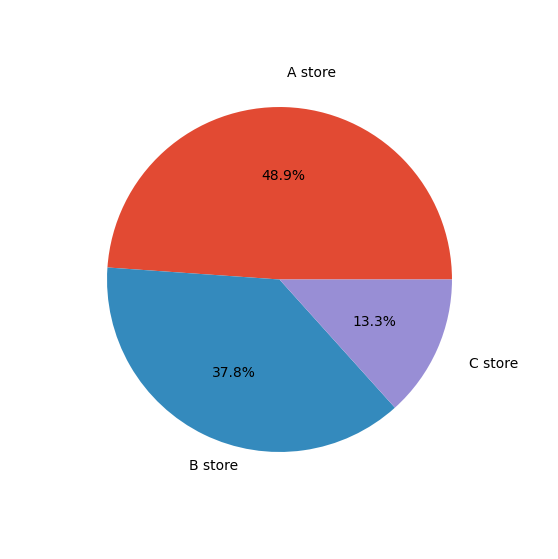

In [25]:
sorted_type =stores.groupby ('Type')
plt.style.use('ggplot')
labels=['A store', 'B store', 'C store']
sizes=sorted_type.describe() ['Size'].round(1)
sizes=[(22/(17+6+22))*100, (17/(17+6+22))*100,(6/(17+6+22))*100]
fig, axes = plt.subplots (1,1, figsize=(7,7))
axes.pie(sizes,
        labels=labels,
         explode=(0.0,0,0),
         autopct='%1.1f%%',
         pctdistance=0.6,
         labeldistance=1.2,
         radius=0.8,
         center=(0.5,0.5))
plt.show()

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

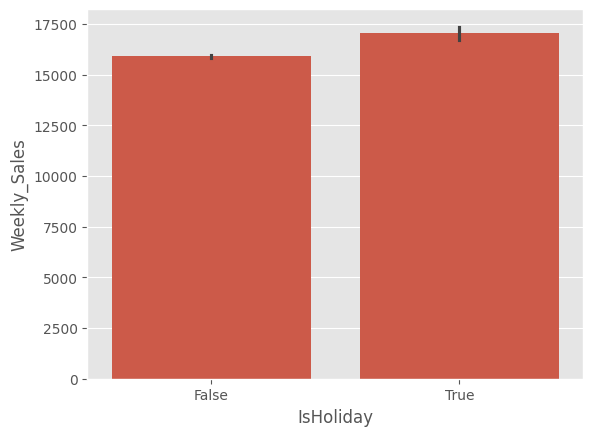

In [26]:
holiday= train ['Weekly_Sales'].loc [train ['IsHoliday']== True]
non_holiday= train ['Weekly_Sales']. loc[train ['IsHoliday']== False]
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train)

In [27]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


In [28]:
type_dummies = pd.get_dummies(data['Type'], prefix='Type')
type_dummies = type_dummies.astype(int)
data = pd.concat([data, type_dummies], axis=1)
data.drop(columns=['Type'], inplace=True)

In [29]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Size,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,151315,1,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,151315,1,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,151315,1,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,151315,1,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,151315,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,118221,0,1,0
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,118221,0,1,0
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,118221,0,1,0
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,118221,0,1,0


In [30]:
data['Date']=pd.to_datetime(data['Date'])

In [31]:
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

In [32]:
data[['Date','month','year']].head()

,Date,month,year
0,2010-02-05,2,2010
1,2010-02-05,2,2010
2,2010-02-05,2,2010
3,2010-02-05,2,2010
4,2010-02-05,2,2010


In [33]:
data['dateofweek_name']=data['Date'].dt.day_name()
data[['Date','dateofweek_name']].head()

,Date,dateofweek_name
0,2010-02-05,Friday
1,2010-02-05,Friday
2,2010-02-05,Friday
3,2010-02-05,Friday
4,2010-02-05,Friday


In [34]:
data['is_weekend']=np.where(data['dateofweek_name'].isin(['Sunday','Saturday']),1,0)
data[['Date','is_weekend']]

,Date,is_weekend
0,2010-02-05,0
1,2010-02-05,0
2,2010-02-05,0
3,2010-02-05,0
4,2010-02-05,0
...,...,...
421565,2012-10-26,0
421566,2012-10-26,0
421567,2012-10-26,0
421568,2012-10-26,0


In [35]:
data['IsHoliday_x']=data['IsHoliday_x'].astype(int)
data['IsHoliday_y']=data['IsHoliday_y'].astype(int)
del data['dateofweek_name']

In [36]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Size,Type_A,Type_B,Type_C,month,year,is_weekend
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,0,151315,1,0,0,2,2010,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,0,151315,1,0,0,2,2010,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,0,151315,1,0,0,2,2010,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,0,151315,1,0,0,2,2010,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,0,151315,1,0,0,2,2010,0


In [37]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Is_Weekend'] = (data['Date'].dt.dayofweek >= 5).astype(int)
#data.drop(columns=['Date'], inplace=True)

In [38]:
del data['is_weekend']
data


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Size,Type_A,Type_B,Type_C,month,year,Month,Year,Is_Weekend
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.00,0.00,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.00,0.00,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.00,0.00,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.00,0.00,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,...,0,118221,0,1,0,10,2012,10,2012,0
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,...,0,118221,0,1,0,10,2012,10,2012,0
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,...,0,118221,0,1,0,10,2012,10,2012,0
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,...,0,118221,0,1,0,10,2012,10,2012,0


Text(0.5, 1.0, 'Correlation Matrix')

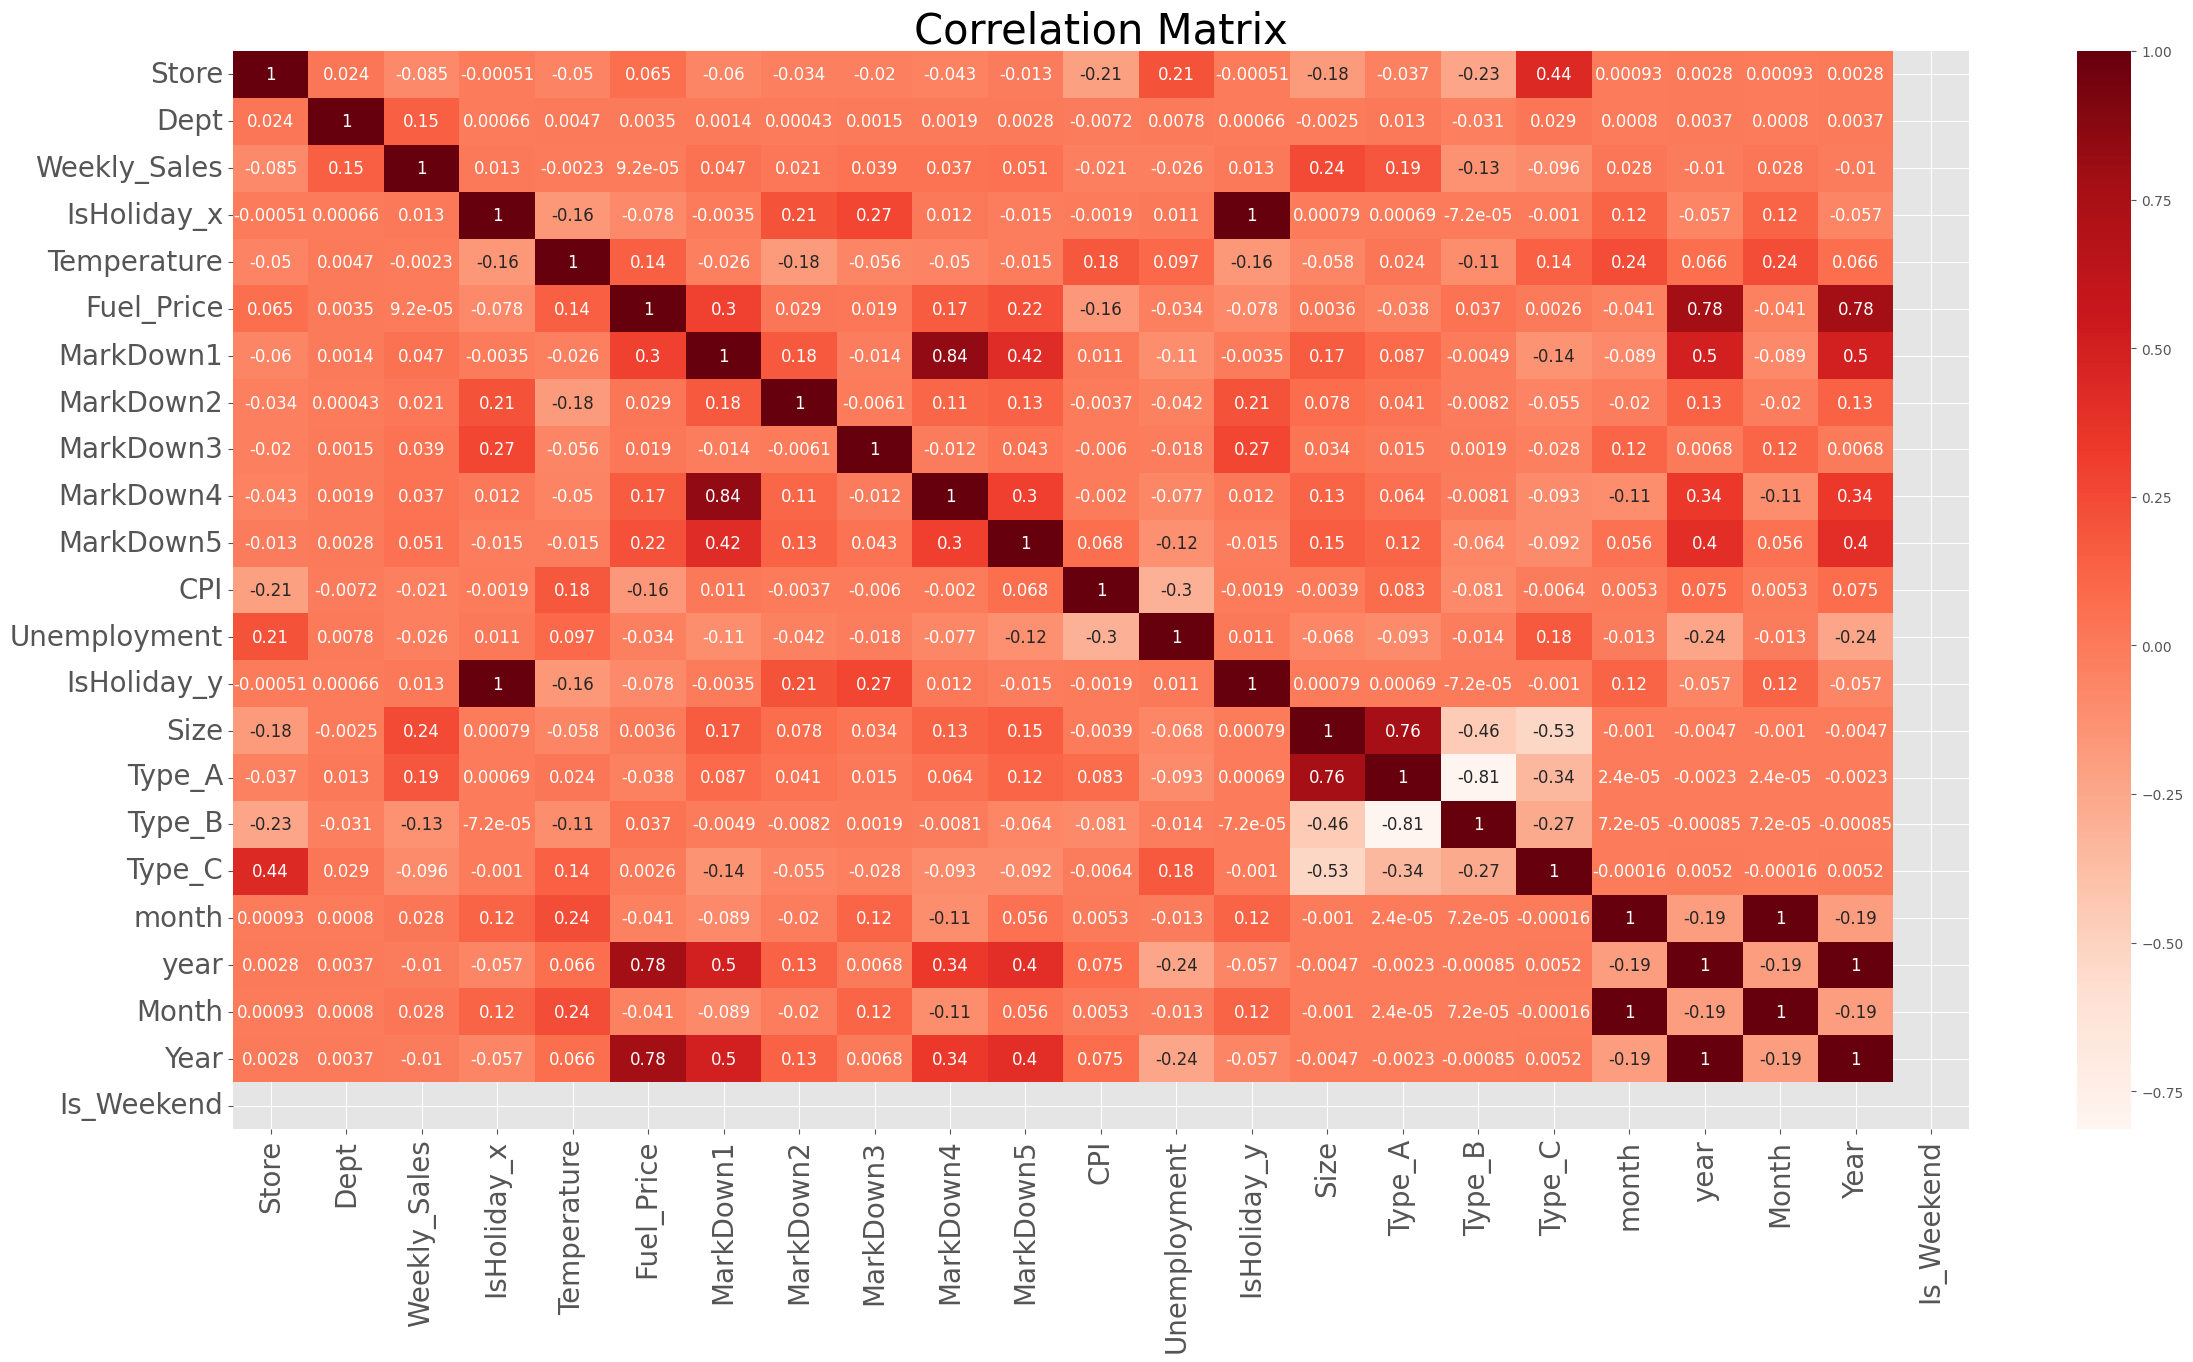

In [39]:
plt.figure(figsize=(28,14))
plt.xticks (fontsize=20)
plt.yticks (fontsize=20)
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), cmap='Reds', annot=True, annot_kws={'size': 12})

plt.title('Correlation Matrix', fontsize=30)

In [92]:
data.to_csv('/content/merged_data.csv',index=False)

In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 420285 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday_x   420285 non-null  int64         
 5   Temperature   420285 non-null  float64       
 6   Fuel_Price    420285 non-null  float64       
 7   MarkDown1     420285 non-null  float64       
 8   MarkDown2     420285 non-null  float64       
 9   MarkDown3     420285 non-null  float64       
 10  MarkDown4     420285 non-null  float64       
 11  MarkDown5     420285 non-null  float64       
 12  CPI           420285 non-null  float64       
 13  Unemployment  420285 non-null  float64       
 14  IsHoliday_y   420285 non-null  int64         
 15  Size          420285 n

In [42]:
x=data.loc[:,data.columns!='Weekly_Sales']
y=data.loc[:,data.columns=='Weekly_Sales']
x=x[['Store','Dept','Size','IsHoliday_x','CPI','Temperature','Type_B','Type_C','Month','Year','IsHoliday_y']]
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x

,Store,Dept,Size,IsHoliday_x,CPI,Temperature,Type_B,Type_C,Month,Year,IsHoliday_y
0,1,1,151315,0,211.096358,42.31,0,0,2,2010,0
1,1,2,151315,0,211.096358,42.31,0,0,2,2010,0
2,1,3,151315,0,211.096358,42.31,0,0,2,2010,0
3,1,4,151315,0,211.096358,42.31,0,0,2,2010,0
4,1,5,151315,0,211.096358,42.31,0,0,2,2010,0
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,118221,0,192.308899,58.85,1,0,10,2012,0
421566,45,94,118221,0,192.308899,58.85,1,0,10,2012,0
421567,45,95,118221,0,192.308899,58.85,1,0,10,2012,0
421568,45,97,118221,0,192.308899,58.85,1,0,10,2012,0


In [44]:
from sklearn.ensemble import RandomForestRegressor


In [45]:
rf=RandomForestRegressor(n_estimators=150,max_depth=30,min_samples_split=5,min_samples_leaf=1)

In [46]:
rf.fit(x_train,y_train.ravel())

RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=150)

In [47]:
Testing_Accuracy_rf=rf.score(x_test,y_test.ravel())*100

In [48]:
print('Testing Accuracy:',Testing_Accuracy_rf,'%')

Testing Accuracy: 96.74528720622725 %


In [49]:
y_pred=rf.predict(x_test)

In [50]:
rms_rf=mean_squared_error(y_test,y_pred,squared=False)
print('RMSE',rms_rf)

RMSE 4117.908526135951


In [51]:
MAE_rf=mean_absolute_error(y_test,y_pred)
print('MAE:',MAE_rf)

MAE: 1626.182005878733


In [52]:
Training_Accuracy_rf=rf.score(x_train,y_train.ravel())*100
print('Training Accuracy',Training_Accuracy_rf,'%')

Training Accuracy 99.06559104253904 %


In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dtr=DecisionTreeRegressor(random_state=0)

In [55]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [56]:
y_pred=dtr.predict(x_test)
Testing_Accuracy_dtr=dtr.score(x_test,y_test.ravel())*100
print('Testing Accuracy:',Testing_Accuracy_dtr,'%')

Testing Accuracy: 94.55987947188075 %


In [57]:
rms_dtr=mean_squared_error(y_test,y_pred,squared=False)
print('RMSE',rms_dtr)

RMSE 5323.835409637849


In [58]:
MAE_dtr=mean_absolute_error(y_test,y_pred)
print('MAE:',MAE_dtr)

MAE: 2068.9108296751015


In [59]:
Training_Accuracy_dtr=rf.score(x_train,y_train.ravel())*100
print('Training Accuracy',Training_Accuracy_dtr,'%')

Training Accuracy 99.06559104253904 %


In [60]:
pip install xgboost

In [61]:
import xgboost as xgb
import warnings

In [62]:
xg_reg=xgb.XGBRegressor(objective='reg:squarederror',nthread=4,n_estimators=500,max_depth=4,learning_rate=0.5)

In [63]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [64]:
pred=xg_reg.predict(x_train)
y_pred=xg_reg.predict(x_test)

In [65]:
Testing_Accuracy_xg_reg=xg_reg.score(x_test,y_test.ravel())*100
print('Testing Accuracy:',Testing_Accuracy_xg_reg,'%')

Testing Accuracy: 94.12206327106377 %


In [66]:
rms_xg_reg=mean_squared_error(y_test,y_pred,squared=False)
print('RMSE',rms_xg_reg)

RMSE 5533.919190794416


In [67]:
MAE_xg_reg=mean_absolute_error(y_test,y_pred)
print('MAE:',MAE_xg_reg)

MAE: 3068.009812765289


In [68]:
Training_Accuracy_xg_reg=xg_reg.score(x_train,y_train.ravel())*100
print('Training Accuracy',Training_Accuracy_xg_reg,'%')

Training Accuracy 94.09053875232357 %


In [69]:
pip install pmdarima

In [70]:
import pmdarima

In [71]:
from pmdarima.arima import auto_arima

In [72]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Size,Type_A,Type_B,Type_C,month,year,Month,Year,Is_Weekend
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0


In [73]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Size,Type_A,Type_B,Type_C,month,year,Month,Year,Is_Weekend
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0


In [74]:
data.Date=pd.to_datetime(data.Date,format='%y-%m-%d')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Size,Type_A,Type_B,Type_C,month,year,Month,Year,Is_Weekend
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,0,151315,1,0,0,2,2010,2,2010,0


In [75]:
data.index=data.Date
#data=data.drop('Date',axis=1)
data=data.resample('MS').mean()

In [76]:
train_data=data[:int(0.7*(len(data)))]
test_data=data[int(0.7*(len(data))):]
train_data=train_data['Weekly_Sales']
test_data=test_data['Weekly_Sales']

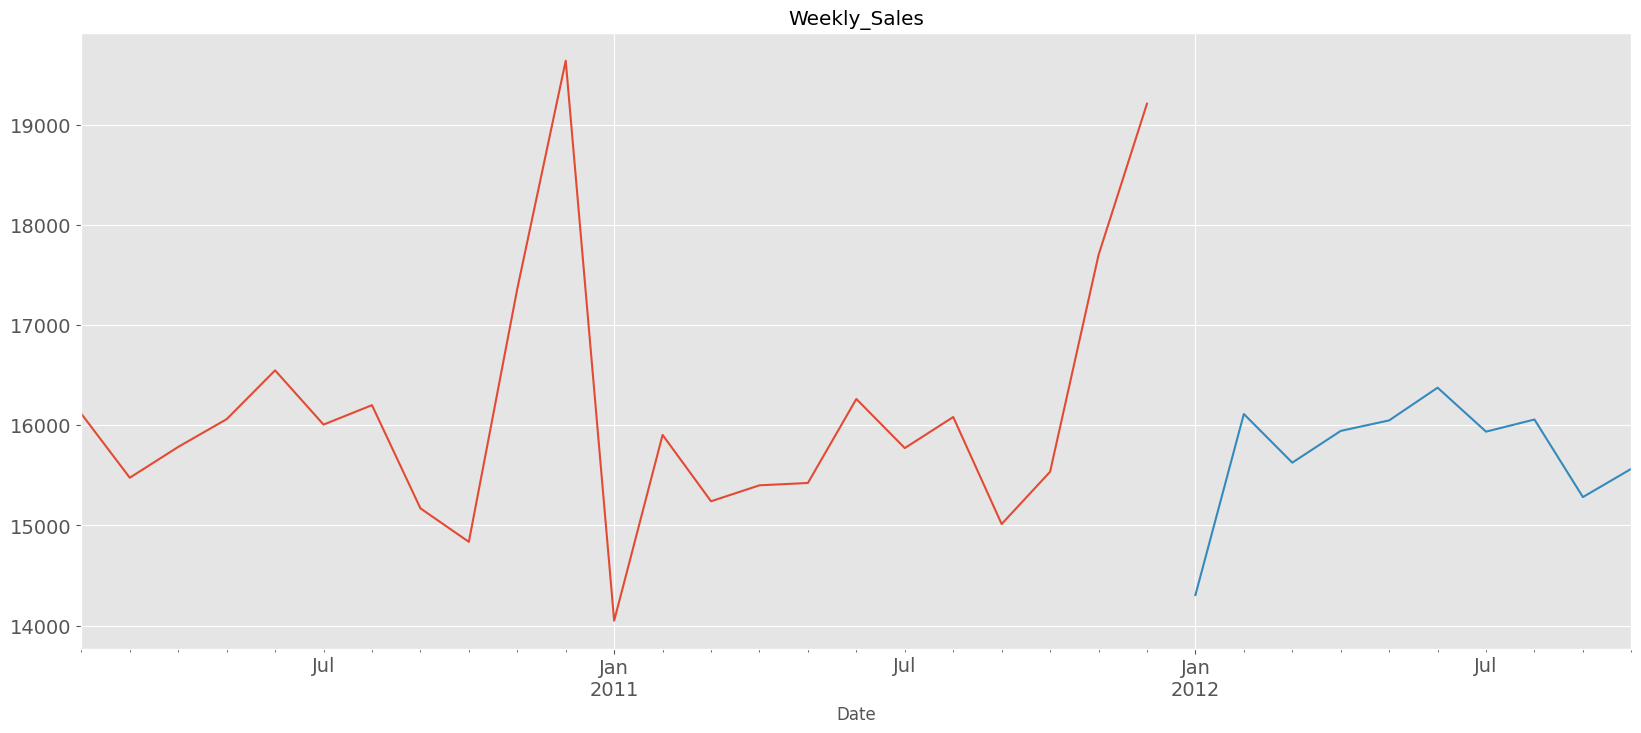

In [77]:
train_data.plot(figsize=(20,8),title='Weekly_Sales',fontsize=14)
test_data.plot(figsize=(20,8),title='Weekly_Sales',fontsize=14)
plt.show()

In [78]:
model_auto_arima=auto_arima(train_data,trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=405.580, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=398.029, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.847, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=399.604, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=513.059, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=401.739, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.347 seconds


In [79]:
model_auto_arima=auto_arima(train_data,trace=True,start_p=0,start_q=0,start_P=0,start_Q=0,max_p=10,max_q=10,max_P=10,max_Q=10,seasonal=True,stepwise=False,error_action='ignore',D=1,max_D=10,suppress_warnings=True,approximation=False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.029, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.604, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=399.327, Time=0.28 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.847, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.739, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=404.410, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=400.484, Time=0.28 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=399.861, Time=0.85 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=399.812, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=403.489, Time=0.47 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=405.580, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=402.551, Time=0.60 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   :

In [80]:
model_auto_arima.fit(train_data)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [81]:
forecast=model_auto_arima.predict(n_periods=len(test_data))

In [82]:
forecast=pd.DataFrame(forecast,index=test_data.index,columns=['prediction'])


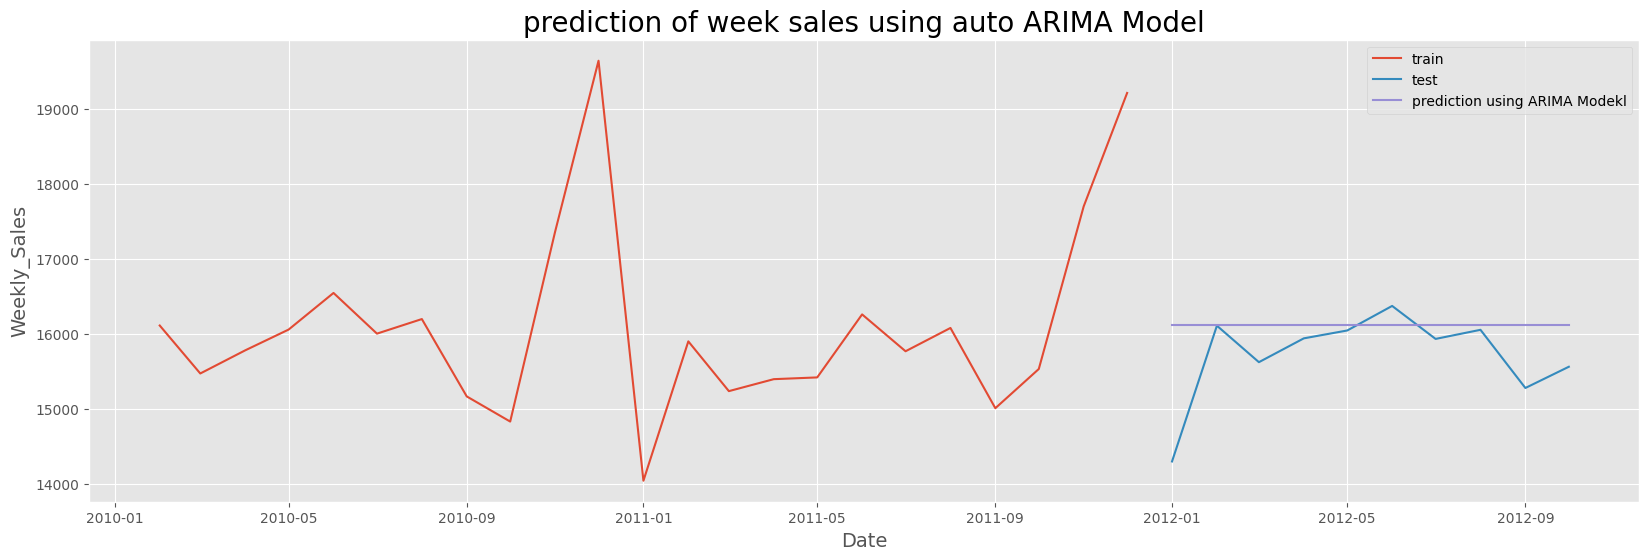

In [83]:
plt.figure(figsize=(20,6))
plt.title('prediction of week sales using auto ARIMA Model',fontsize=20)
plt.plot(train_data,label='train')
plt.plot(test_data,label='test')
plt.plot(forecast,label='prediction using ARIMA Modekl')
plt.legend(loc='best')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Weekly_Sales',fontsize=14)
plt.show()

In [84]:
print('Mean Squared Error (MSE) of ARIMA:',mean_squared_error(test_data,forecast))
RMSE_arima=math.sqrt(mean_squared_error(test_data,forecast))
print('Root Mean Squared Error (RMSE) of ARIMA:',RMSE_arima)
MAD_arima=mean_absolute_error(test_data,forecast)
print('Mean Absolute Devision (MAD) of ARIMA:',MAD_arima)

Mean Squared Error (MSE) of ARIMA: 469971.08318421885
Root Mean Squared Error (RMSE) of ARIMA: 685.5443699602665
Mean Absolute Devision (MAD) of ARIMA: 446.9938500521428


In [85]:
pip install prettytable

In [86]:
from prettytable import PrettyTable
ptb=PrettyTable()
ptb.field_names=["model","training","testing accuracy","RMSE","MAE/MAD(ARIMA)"]
ptb.add_row(["Random Forest",Training_Accuracy_rf,Testing_Accuracy_rf,rms_rf,MAE_rf])
ptb.add_row(["Decision Tree",Training_Accuracy_dtr,Testing_Accuracy_dtr,rms_dtr,MAE_dtr])
ptb.add_row(["XgBoost",Training_Accuracy_xg_reg,Testing_Accuracy_xg_reg,rms_xg_reg,MAE_xg_reg])
ptb.add_row(["Random Forest",np.nan,np.nan,RMSE_arima,MAD_arima])
print(ptb)

+---------------+-------------------+-------------------+-------------------+--------------------+
|     model     |      training     |  testing accuracy |        RMSE       |   MAE/MAD(ARIMA)   |
+---------------+-------------------+-------------------+-------------------+--------------------+
| Random Forest | 99.06559104253904 | 96.74528720622725 | 4117.908526135951 | 1626.182005878733  |
| Decision Tree | 99.06559104253904 | 94.55987947188075 | 5323.835409637849 | 2068.9108296751015 |
|    XgBoost    | 94.09053875232357 | 94.12206327106377 | 5533.919190794416 | 3068.009812765289  |
| Random Forest |        nan        |        nan        | 685.5443699602665 | 446.9938500521428  |
+---------------+-------------------+-------------------+-------------------+--------------------+


In [87]:
from sklearn.model_selection import cross_val_score
ranfor=RandomForestRegressor(n_estimators=58,max_depth=27,min_samples_split=3,min_samples_leaf=1)

In [88]:
ranfor.fit(x_train,y_train.ravel())

RandomForestRegressor(max_depth=27, min_samples_split=3, n_estimators=58)

In [89]:
y_pred=ranfor.predict(x_test)

In [90]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Size,Type_A,Type_B,Type_C,month,year,Month,Year,Is_Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,22.025485,44.211836,2010-02-15 12:02:59.222758400,16115.148511,0.249682,35.584066,2.693198,0.0,0.0,0.0,...,0.249682,137433.023453,0.511303,0.390399,0.098298,2.0,2010.0,2.0,2010.0,0.0
2010-03-01,22.074351,44.070778,2010-03-15 12:01:17.175670016,15476.271493,0.000000,46.695720,2.786447,0.0,0.0,0.0,...,0.000000,137354.854700,0.511612,0.388601,0.099787,3.0,2010.0,3.0,2010.0,0.0
2010-04-01,22.088466,44.150672,2010-04-15 22:57:26.040515584,15784.325587,0.000000,56.407791,2.867529,0.0,0.0,0.0,...,0.000000,137364.266216,0.511561,0.388923,0.099516,4.0,2010.0,4.0,2010.0,0.0
2010-05-01,22.150366,44.298667,2010-05-17 11:29:13.083870976,16061.212479,0.000000,64.883664,2.917184,0.0,0.0,0.0,...,0.000000,137347.028129,0.513462,0.387957,0.098581,5.0,2010.0,5.0,2010.0,0.0
2010-06-01,22.216235,44.230524,2010-06-14 12:16:03.140225536,16548.757204,0.000000,74.595623,2.787994,0.0,0.0,0.0,...,0.000000,136964.668417,0.512697,0.387536,0.099768,6.0,2010.0,6.0,2010.0,0.0


In [91]:
cv=cross_val_score(ranfor,x,y.ravel(),cv=6)

In [93]:
np.mean(cv)

0.7184357204444839

In [94]:
pickle.dump(ranfor,open('rf_pickel.pkl','wb'))